In [1]:
import re
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load the dataset
file_path = "recipes_igredient_sep_all.csv"
df = pd.read_csv(file_path)

In [3]:
df = df[df["ingredients"].str.strip() != ""]

In [4]:
df["ingredients"] = (
    df["ingredients"]
    .str.replace(r"\s*-\s*", " ", regex=True)  
    .str.replace(r"[^\w\s/]", "", regex=True)   
    .str.strip()                                
)

In [5]:
df["quantity"] = df["ingredients"].str.extract(r"^(\d+/?\d*)\s") 


df["ingredients"] = (
    df["ingredients"]
    .str.replace(r"^\d+/?\d*\s*", "", regex=True)  
    .str.replace(r"\s+", " ", regex=True)          
)

In [6]:
def preprocess_ingredient(text):
    # Supprimer les chiffres, fractions, et unités (ex: "1/2 cup" → "")
    text = re.sub(r"\d+/?\d*\s*(cup|tsp|tbsp|kg|g|oz|lb|%)?", "", text, flags=re.IGNORECASE)
    # Supprimer les adjectifs superflus (ex: "chopped", "diced")
    text = re.sub(r"\b(chopped|diced|minced|dried|fresh|grated|finely|peeled|halved|crushed|shredded|grated|large|small|medium|unsalted|salted|frozen|thinly|skinless|cubed|package|packet|packed|seeded|boneless|trimmed)\b", "", text, flags=re.IGNORECASE)
    return text.strip()

df["ingredients"] = df["ingredients"].apply(preprocess_ingredient)
df["ingredients"]

0             ground pork
1        lean ground beef
2                   onion
3                  tomato
4                  garlic
               ...       
41214         sliced okra
41215           olive oil
41216               onion
41217     vegetable stock
41218       peanut butter
Name: ingredients, Length: 41219, dtype: object

In [9]:
df.drop(columns=['quantity'], inplace=True)

In [11]:
import re

# Function to clean ingredient text
def clean_alphanumeric(ingredient):
    # Remove fractions like ½, ¼, ¾
    ingredient = re.sub(r'[¼½¾⅓⅔⅛⅜⅝⅞%-]', '', ingredient)

    # Optional: Remove numbers (both standalone and mixed with units)
    ingredient = re.sub(r'\d+[\w/]*', '', ingredient)

    # Remove extra spaces
    ingredient = re.sub(r'\s+', ' ', ingredient).strip()

    return ingredient

C:\Users\hcene\AppData\Local\Temp\ipykernel_22664\777765759.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Ingredient", data=top_ingredients, palette="viridis")


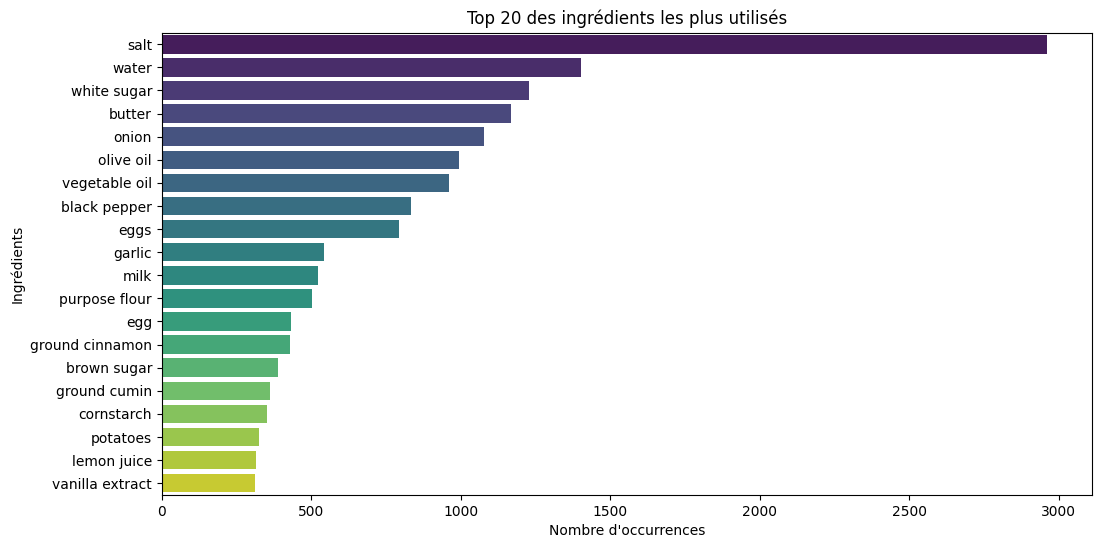

In [14]:
#df["cleaned_ingredients"] = df["cleaned_ingredients"].apply(clean_alphanumeric)
#all_ingredients = ",".join(df["cleaned_ingredients"]).split(",")
#all_ingredients = [ing.strip().lower() for ing in all_ingredients if ing.strip()]
from collections import Counter
df["ingredients"] = df["ingredients"].apply(clean_alphanumeric)
#dropping empty ingredients
df = df[df["ingredients"].str.strip() != ""]
all_ingredients = df["ingredients"]
ingredient_counts = Counter(all_ingredients)

# Top 20 ingrédients les plus courants
top_ingredients = pd.DataFrame(ingredient_counts.most_common(20), columns=["Ingredient", "Count"])

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Ingredient", data=top_ingredients, palette="viridis")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Ingrédients")
plt.title("Top 20 des ingrédients les plus utilisés")
plt.show()

In [16]:
# Get a unique set of ingredient names
unique_ingredients = set(df["ingredients"].unique())

# Sort ingredients by length (smallest first)
sorted_ingredients = sorted(unique_ingredients, key=len)

# Dictionary to store base ingredients
base_ingredient_map = {}

# Iterate over sorted ingredients
for i, ing in enumerate(sorted_ingredients):
    # Check if this ingredient is contained in any longer ingredient
    for longer_ing in sorted_ingredients[i+1:]:
        if ing in longer_ing and ing != longer_ing:  # Ensure it's a proper substring
            base_ingredient_map[longer_ing] = ing  # Assign shorter one as base ingredient

# Apply the mapping
df["base_ingredient1"] = df["ingredients"].map(lambda x: base_ingredient_map.get(x, x))

In [17]:
df["ingredients"].head(10), df["base_ingredient1"].head(10)

(0            ground pork
 1       lean ground beef
 2                  onion
 3                 tomato
 4                 garlic
 5                  basil
 6                   salt
 7            white sugar
 8        lasagna noodles
 9    curd cottage cheese
 Name: ingredients, dtype: object,
 0            ground
 1       lean ground
 2             onion
 3            tomato
 4            garlic
 5                 s
 6                 s
 7             sugar
 8                 s
 9    cottage cheese
 Name: base_ingredient1, dtype: object)

In [18]:
df.drop(columns=['base_ingredient1'], inplace=True)

In [27]:
df["ingredients"].head(20)

0             ground pork
1        lean ground beef
2                   onion
3                  tomato
4                  garlic
5                   basil
6                    salt
7             white sugar
8         lasagna noodles
9     curd cottage cheese
10                   eggs
11                   salt
12           black pepper
15          breast halves
16                   salt
17                   eggs
18           bread crumbs
19              olive oil
20              olive oil
21          purpose flour
Name: ingredients, dtype: object

In [28]:
df.to_csv("recipe_semi_cleaned_ingredients.csv", index=False)